# Assignment on Unsupervised Clustering

### Overview:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

### Business Goal:
Job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then suggest the countries which the CEO needs to focus on the most

### Steps followed in order to build a Clustering model- 
1. Read the data
2. Cleaning the data
3. Exploratory Data Analysis
4. Data preparation
5. Hopkins stats and Scaling the data
6. Building the model using K- means algorithm
7. Building the model using Hierarchical clustering
8. Conclusion


## Step 1. Read the data

In [255]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")

In [256]:
# Importing necessary libraries

import numpy as np
import pandas as pd

# Setting limit to display max rows and max columns

pd.set_option('display.max_columns',12)
pd.set_option('display.max_rows',10)

In [257]:
# Read and display the data

df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [258]:
# Routine check commands

df.shape

(167, 10)

In [259]:
# Fetching all the columns from the dataset

df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [260]:
#Fetcing the stats on numerical columns

df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [261]:
# Checking the data types of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.5+ KB


In [262]:
# Check the datatypes 

df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

- #### Understanding: 
None of the columns' data types are inconsistent. Hence, no need to change any datatype.

## Step 2: Clean the data

In [263]:
# Renaming few columns inorder for better understanding

df.rename(columns= {'life_expec' : 'life_expectancy', 'total_fer':'total_fertility'},inplace =True)
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [264]:
# Checking missing values percentage

round(100*(df.isnull().sum())/len(df), 2)

country            0.0
child_mort         0.0
exports            0.0
health             0.0
imports            0.0
income             0.0
inflation          0.0
life_expectancy    0.0
total_fertility    0.0
gdpp               0.0
dtype: float64

- #### Understanding: 
There are no missing values in any of the columns. This eliminates the case of imputing or removing NULL values.

In [265]:
# Check if there are any duplicates in any of the columns

print('The dataset contains repeated country:', df.duplicated().any())

df.describe()

The dataset contains repeated country: False


,child_mort,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Data has no duplicate values

### Conversion:
Converting the columns- **health, income** and **exports**  as they do not present the correct information

In [266]:
# Converting the values

df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100
print('After Conversion...')
df.head()

After Conversion...


,country,child_mort,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Step 3. Exploratory Data Analysis

In [267]:
# Importing necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns

- ### Univarate Analysis:

In [268]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expectancy', 'total_fertility', 'gdpp'],
      dtype='object')

In [269]:
cols = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expectancy', 'total_fertility', 'gdpp']

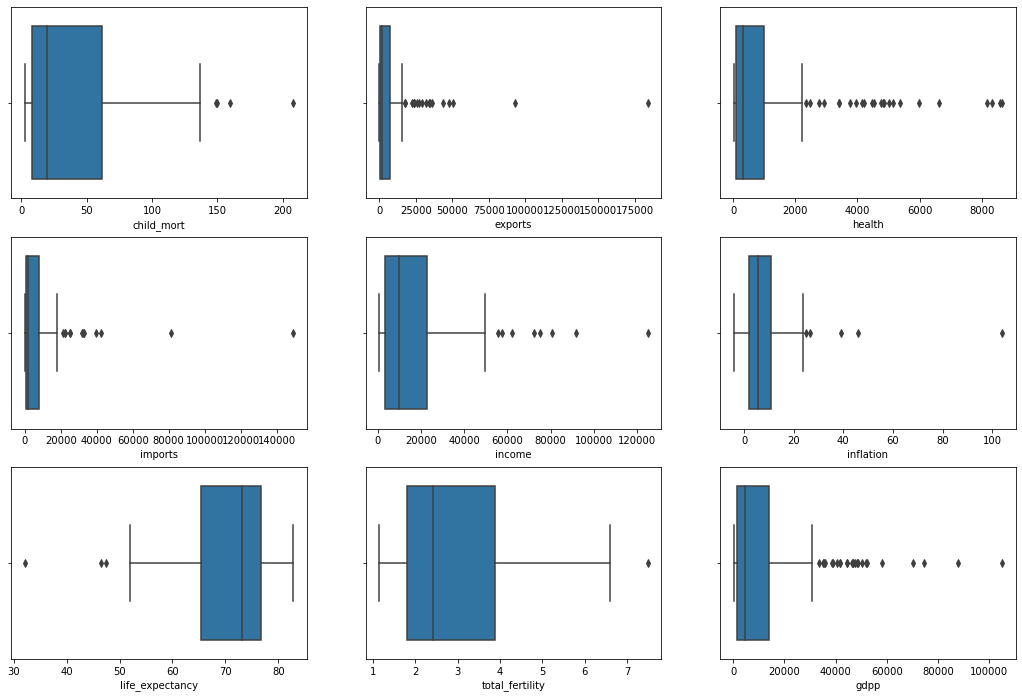

In [270]:
# Creating Boxplots for all the columns in the data using Subplots

plt.figure(figsize = (18, 12))

for i in enumerate(cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

#### Observation:</br>
- Every column has few outliers.
- Columns- 'Imports', 'GDP', 'Health' and 'Exports' and 'Income' have high number of outliers. We can either treat these outliers by using Binning or Capping. However, our focus columns-  'GDP', 'Child_Mort' and 'Income' do not have outliers on lower quartile but on higher. Let's not treat Outliers for these columns as these Outliers can themselves form another cluster. 
- All other columns have 4-5 Outliers, ignorable.

#### Understanding:</r>
- If code execution is continued with the Outliers for 'GDPP' and 'Income', we would observe that the Centroids for the Clusters will be placed at much farther distance. This will change the overall shape of the Cluster.
- As there are less number of countries, i.e. 167 to be exact and as mentioned in the above point, the Overall shape would change and results would not be as expected.
- If results could be ruined then the Countries in dire need of AID wont be visible in our Final Result.

Since we have the liberty of having Outliers, **let's continue having them.**

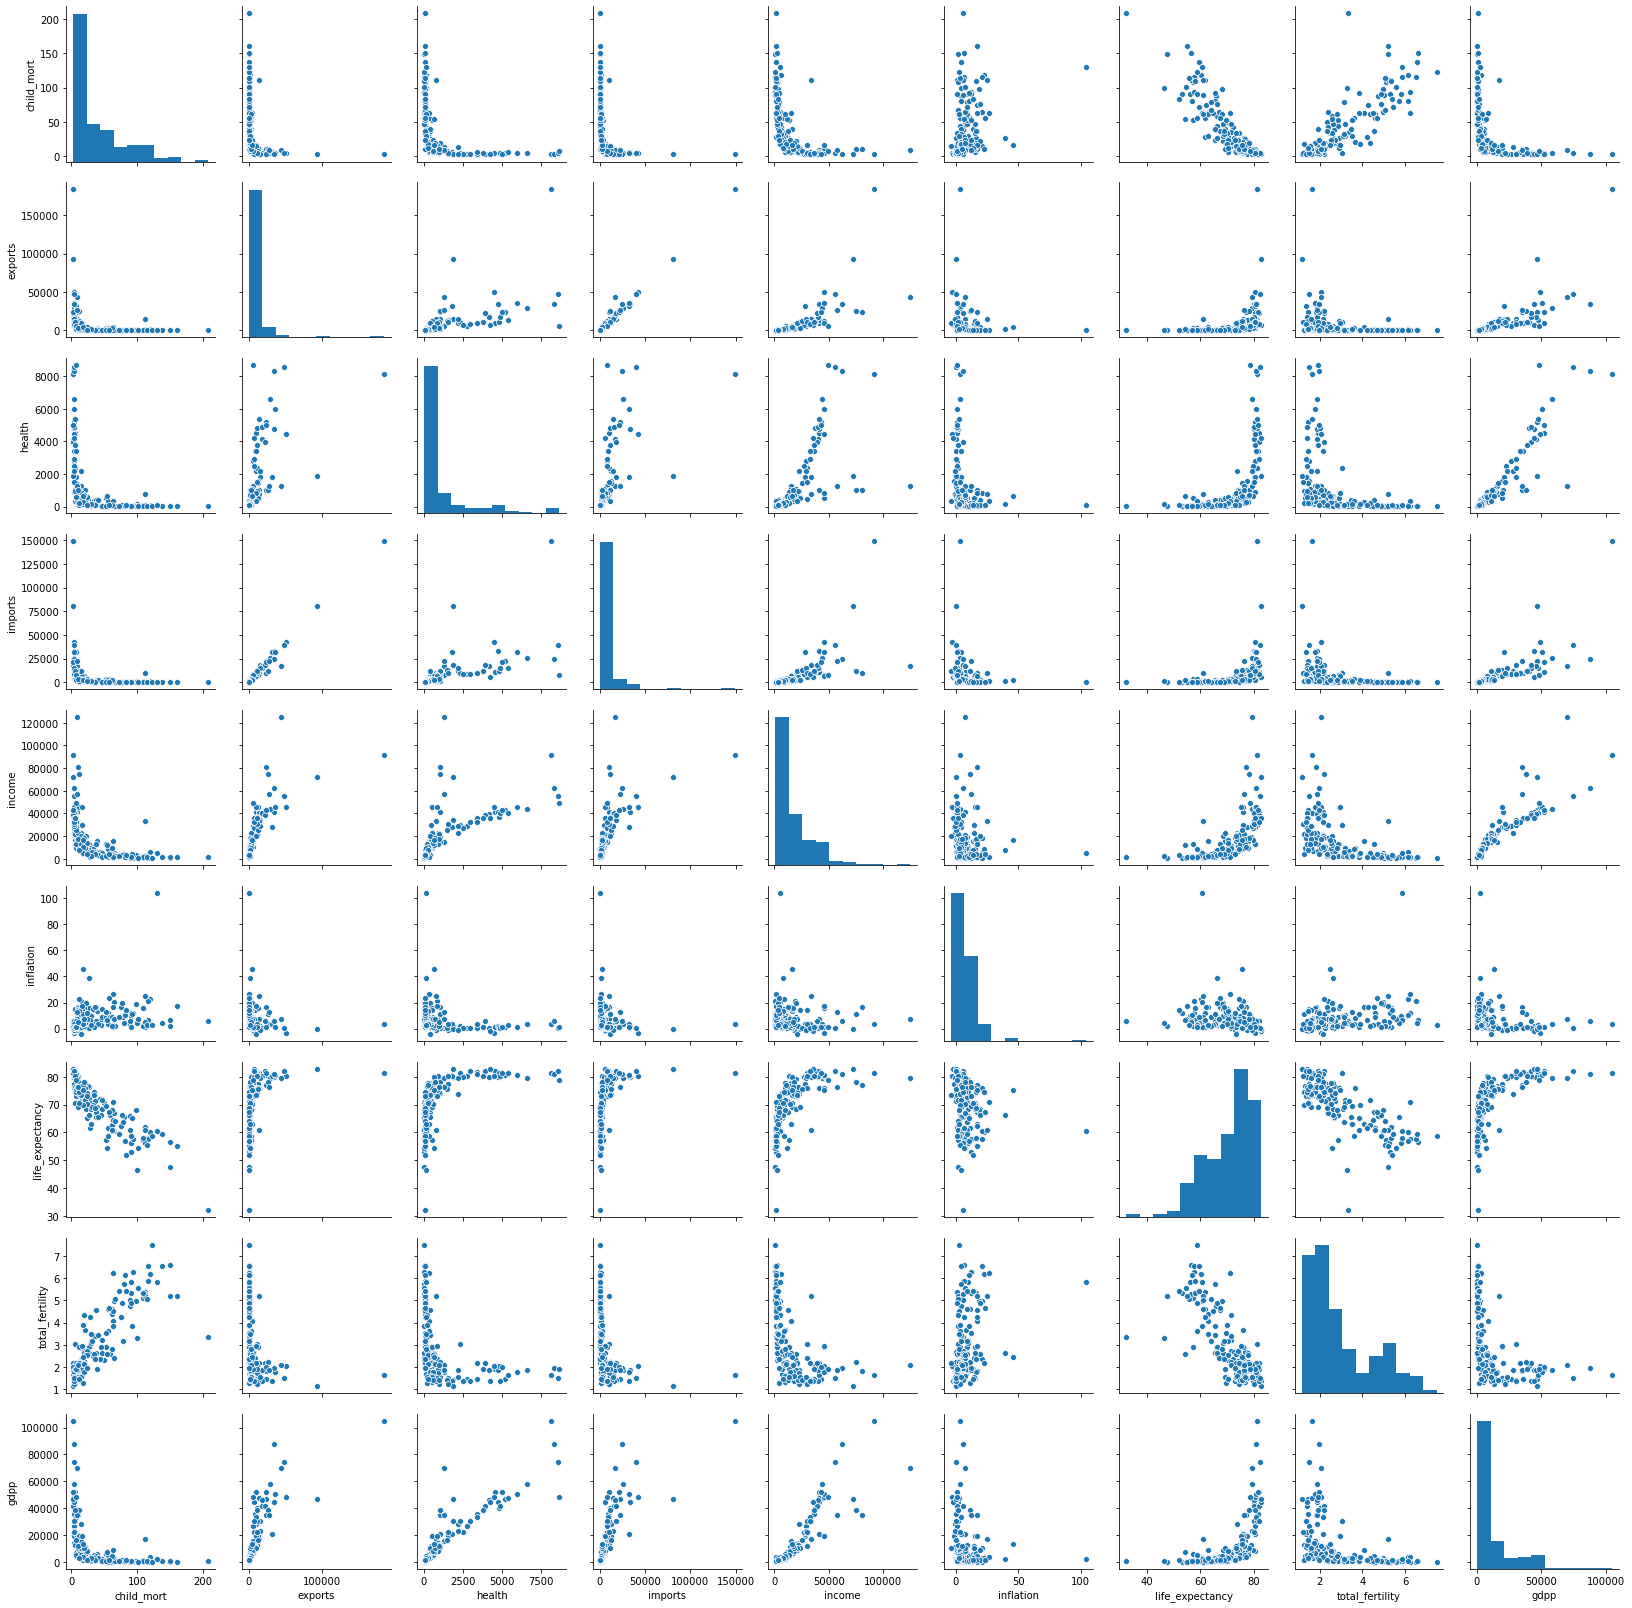

In [271]:
# Checking the correlation b/w all variables 

sns.pairplot(df)
plt.show()

In [272]:
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expectancy,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fertility,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


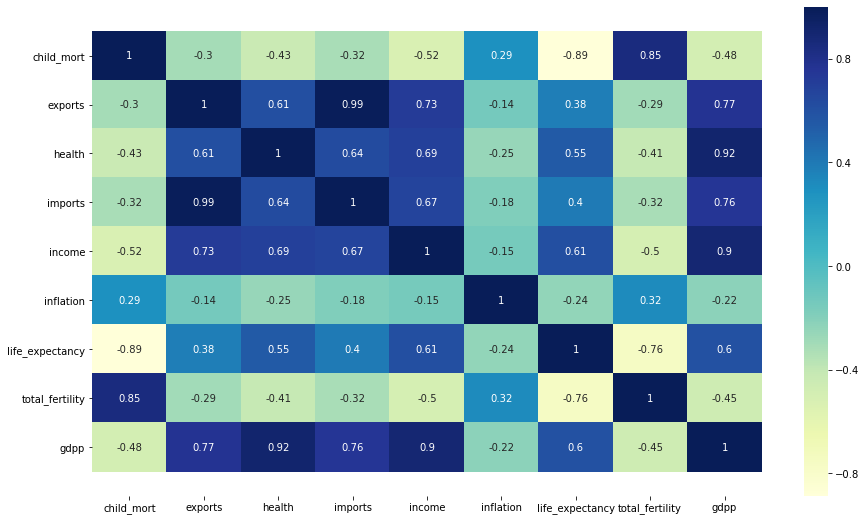

In [273]:
# Find the correlation between variables by plotting a heatmap

plt.figure(figsize = (15,9))
ax = sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

#### Understading:
1. 'child_mort' has a strong inverse correlation with 'income', 'life_expectancy' and 'gdpp'.
2. 'income' is correlated with 'exports' and 'gdpp'.
3. 'exports' is correlated with 'imports'
4. 'life_expectancy' is correlated with 'income' and 'gdpp'.

#### The variables can be divided into 
1. **Economic factors** containing Economic feature- exports, imports, income, inflation, gdpp, health
2. **Health factors** - child_mort, life_expectancy, total_fertility

## Step 4. Data Preparation

In [274]:
from sklearn.preprocessing import StandardScaler

In [275]:
# Copying the dataframe to another temp- dataframe and dropping the column- 'country' as String value cannot be Scaled

df1 = df.copy()
df.drop('country', axis = 1, inplace = True)

In [276]:
df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expectancy', 'total_fertility', 'gdpp'],
      dtype='object')

In [277]:
# Scaling the data after Country is removed

scale = StandardScaler()
df2 = scale.fit_transform(df)

In [278]:
# Scaled data is returned in the form of a Numpy array

df2

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [279]:
# Convert that numpy array to a dataframe

df2 = pd.DataFrame(df2)
df2.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expectancy', 'total_fertility', 'gdpp']
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## Step 5. Hopkins Stats

In [280]:
# Use Hopkins stats to check if the given data is of any worth for creating clusters

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [281]:
# Calculating the Hopkins score 10 times

for i in range(10):
    print(f"Hopkins score for iteration {i + 1} is {hopkins(df2)}")

Hopkins score for iteration 1 is 0.9164688978903449
Hopkins score for iteration 2 is 0.9377128265653425
Hopkins score for iteration 3 is 0.8784590205307339
Hopkins score for iteration 4 is 0.9376068932333232
Hopkins score for iteration 5 is 0.939376135496345
Hopkins score for iteration 6 is 0.8798430298314907
Hopkins score for iteration 7 is 0.932783497681493
Hopkins score for iteration 8 is 0.9131249764140428
Hopkins score for iteration 9 is 0.8888304063985396
Hopkins score for iteration 10 is 0.9472782783829536


As per rule, if score of Hopkins is near to or equal to 1, Clusters can be formed on that dataframe. 
Thus, as per above results the average score is somewhat equal to 0.9074.
**Hence, Clusters can be formed**

## Step 6: Building a model using K-Means

In [282]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [283]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [284]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 3, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 3, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

#### Finding optimal number of Cluster

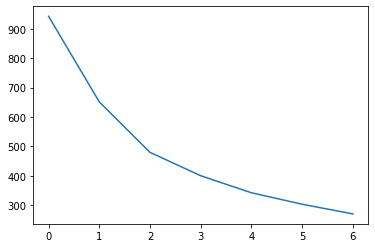

In [285]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df2)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

Elbow curve looks sharp at value = 2 and then gradually goes low at value = 3

In [286]:
# Silhouette analysis


range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df2)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.4277518271600435
For n_clusters=5, the silhouette score is 0.43077513396770467
For n_clusters=6, the silhouette score is 0.3927936961757552
For n_clusters=7, the silhouette score is 0.31136565295133073
For n_clusters=8, the silhouette score is 0.30754095167389417


The Silhoutte score seems to be decent near k = 3 and 4. Let's continue with k = 3 as obtained in Elbow curve method

In [287]:
# Final model with k=3

kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [288]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [289]:
# Assigning the label to our original dataframe

df1['cluster_id'] = kmeans.labels_
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


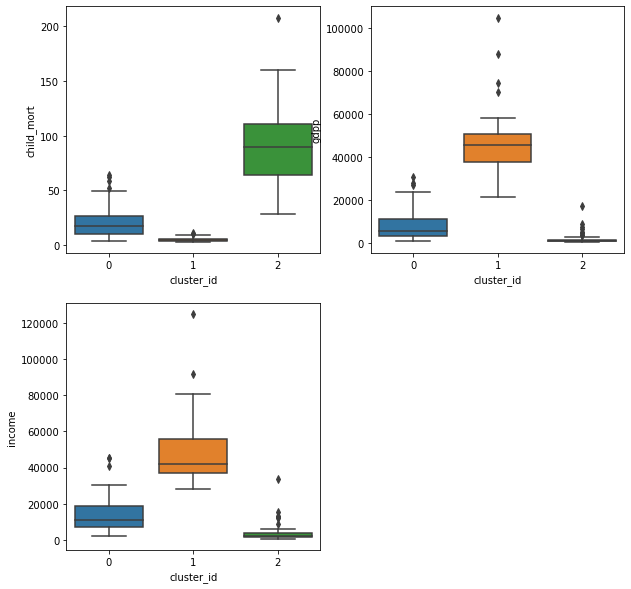

In [290]:
# plot 

plt.figure(figsize = [10,10])
plt.subplot(2,2,1)
sns.boxplot(x='cluster_id', y='child_mort', data=df1)

plt.subplot(2,2,2)
sns.boxplot(x='cluster_id', y='gdpp', data=df1)

plt.subplot(2,2,3)
sns.boxplot(x='cluster_id', y='income', data=df1)

plt.show()

In [291]:
# Fetching the count for all different clusters

df1.cluster_id.value_counts()

0    91
2    48
1    28
Name: cluster_id, dtype: int64

In [292]:
# Calculating mean of the required columns(child_mort, income, gdpp) for comparison

new_GDPP = pd.DataFrame(df1.groupby(["cluster_id"]).gdpp.mean())
new_child_mort = pd.DataFrame(df1.groupby(["cluster_id"]).child_mort.mean())
new_income = pd.DataFrame(df1.groupby(["cluster_id"]).income.mean())
km_df = pd.concat([ new_GDPP ,  new_child_mort , new_income ], axis=1)
km_df

,gdpp,child_mort,income
cluster_id,,,
0,7979.912088,20.357143,13968.021978
1,48114.285714,5.046429,50178.571429
2,1909.208333,91.610417,3897.354167


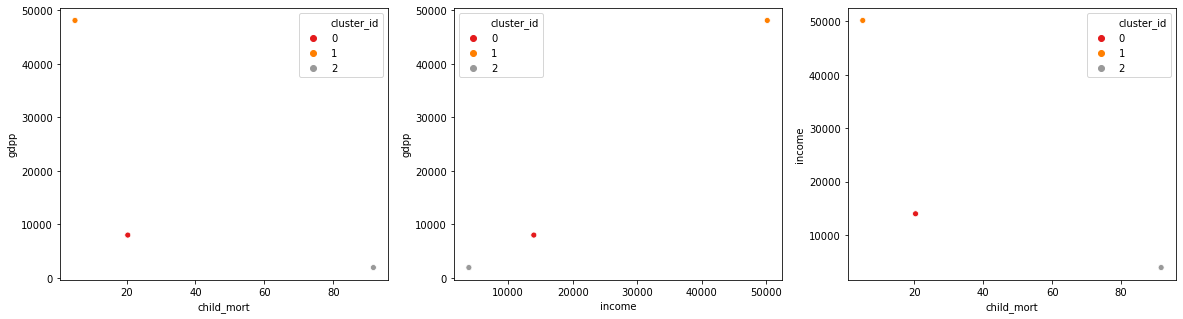

In [293]:
# Scatter plot to view all the 3 clusters

f, axes = plt.subplots(1, 3, figsize=(20,5))

sns.scatterplot(x='child_mort',y='gdpp', data = km_df, hue = km_df.index ,ax=axes[0],palette='Set1')
sns.scatterplot(x='income',y='gdpp', data = km_df , hue = km_df.index, ax=axes[1],palette='Set1')
sns.scatterplot(x='child_mort',y='income', data = km_df ,hue = km_df.index,ax=axes[2],palette='Set1')

plt.show()

- Country having low gdpp and high child mortality could be assumed as Under-developing ones
- Country having high gdpp and low child mortality could be assumed as developed ones
- Country having low gdpp and low child mortality could be assumed as Developing ones

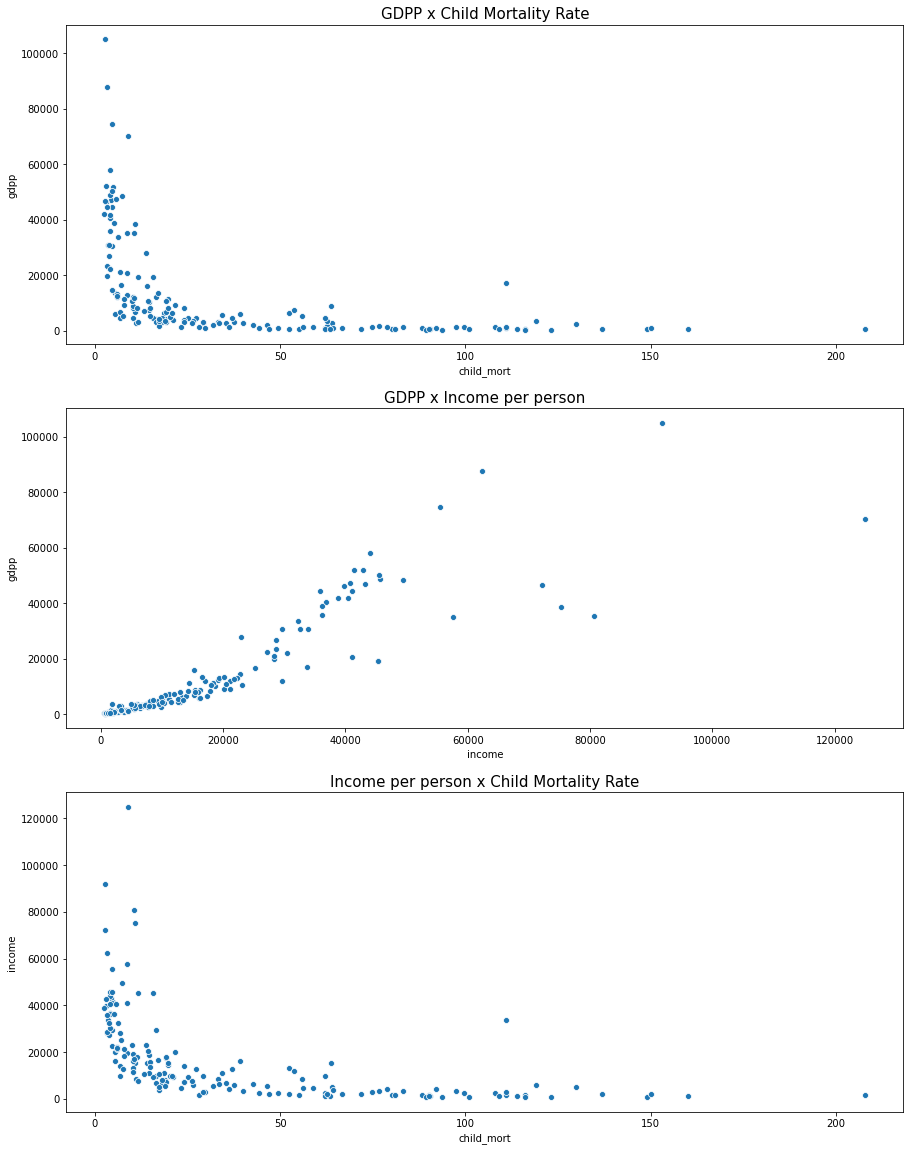

In [294]:
        
f, axes = plt.subplots(3, 1, figsize=(15,20))
sns.scatterplot(x='child_mort',y='gdpp',legend='full',data=df1,ax=axes[0])
axes[0].set_title('GDPP x Child Mortality Rate',fontsize=15)

sns.scatterplot(x='income',y='gdpp',legend='full',data=df1,ax=axes[1])
axes[1].set_title('GDPP x Income per person',fontsize=15)

sns.scatterplot(x='child_mort',y='income',legend='full',data=df1,ax=axes[2])
axes[2].set_title('Income per person x Child Mortality Rate',fontsize=15)

plt.show()

#### Observation:

- In income vs child_mort, there is some clustering where if child_mort is more, thus income is less.
- In gdpp vs income, there is some clustering where gdpp is more, then income is also more.

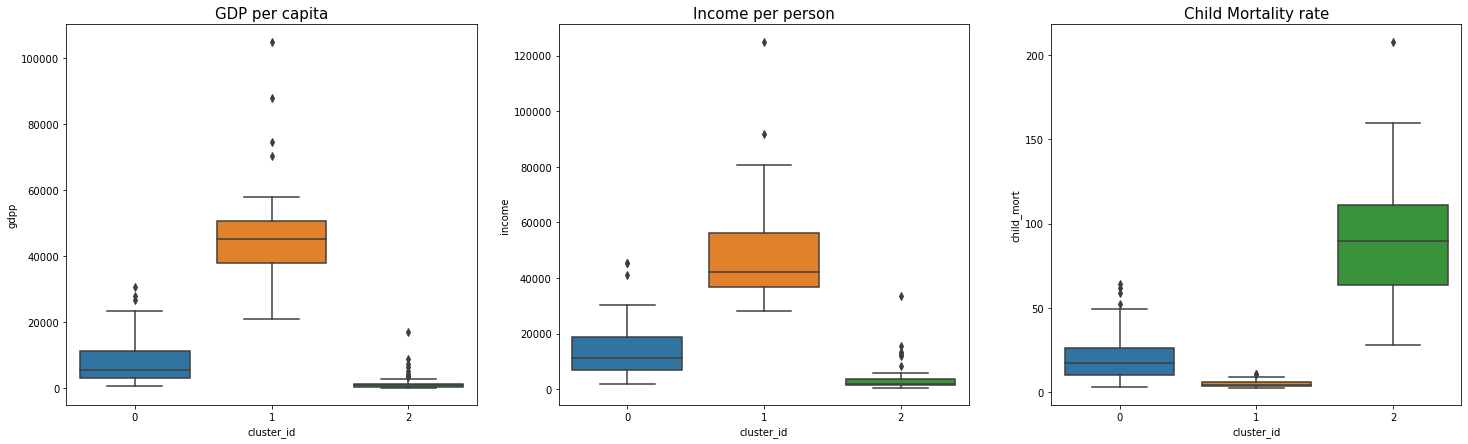

In [295]:
# Viewing the boxplots for the created Clusters_id

f, axes = plt.subplots(1, 3, figsize=(25,7))

sns.boxplot(x='cluster_id',y='gdpp',data=df1,ax=axes[0])
axes[0].set_title('GDP per capita',fontsize=15)

sns.boxplot(x='cluster_id',y='income',data=df1,ax=axes[1])
axes[1].set_title('Income per person',fontsize=15)

sns.boxplot(x='cluster_id',y='child_mort',data=df1,ax=axes[2])
axes[2].set_title('Child Mortality rate',fontsize=15)

plt.show()

In [296]:
# Sorting values based on the above plot to pick the country with diremost need for Hierarchical Clustering model

df1[df1['cluster_id']==0].sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, True, False])

,country,child_mort,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,cluster_id
109,Nepal,47.0,56.7136,31.0800,215.488,1990,15.100,68.3,2.61,592,0
146,Tajikistan,52.4,109.9620,44.1324,432.468,2110,12.500,69.6,3.51,738,0
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440,7.140,70.4,2.33,758,0
27,Cambodia,44.4,425.2260,44.6448,467.670,2520,3.120,66.1,2.88,786,0
83,Kyrgyz Republic,29.6,454.0800,54.3840,718.960,2790,10.000,68.5,3.10,880,0
...,...,...,...,...,...,...,...,...,...,...,...
122,Portugal,3.9,6727.5000,2475.0000,8415.000,27200,0.643,79.8,1.39,22500,0
135,Slovenia,3.2,15046.2000,2201.9400,14718.600,28700,-0.987,79.5,1.57,23400,0
60,Greece,3.9,5944.9000,2770.7000,8258.300,28700,0.673,80.4,1.48,26900,0
10,Bahamas,13.8,9800.0000,2209.2000,12236.000,22900,-0.393,73.8,1.86,28000,0


## Step 7: Building a Model using Hierarchical Clustering

In [297]:
# Importing libraries

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [298]:
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [299]:
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


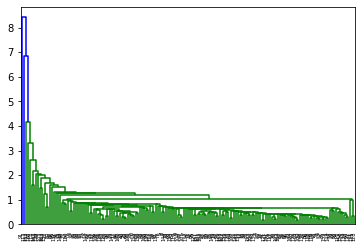

In [300]:
# Using Single linkage


mergings = linkage(df2, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

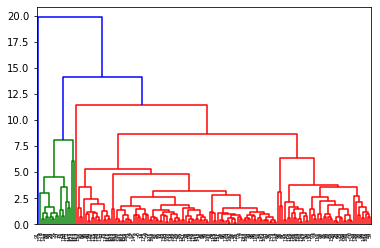

In [301]:
# Using Complete linkage

mergings = linkage(df2, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

As per Dendrogram we can see only 2 shades. However, we shall continue with 3 clusters as it makes more sense to divide the Countries into 3 sections rather than only 2.

In [302]:
# 3 clusters

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [303]:
# Assign cluster labels

df1['cluster_labels'] = cluster_labels
df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


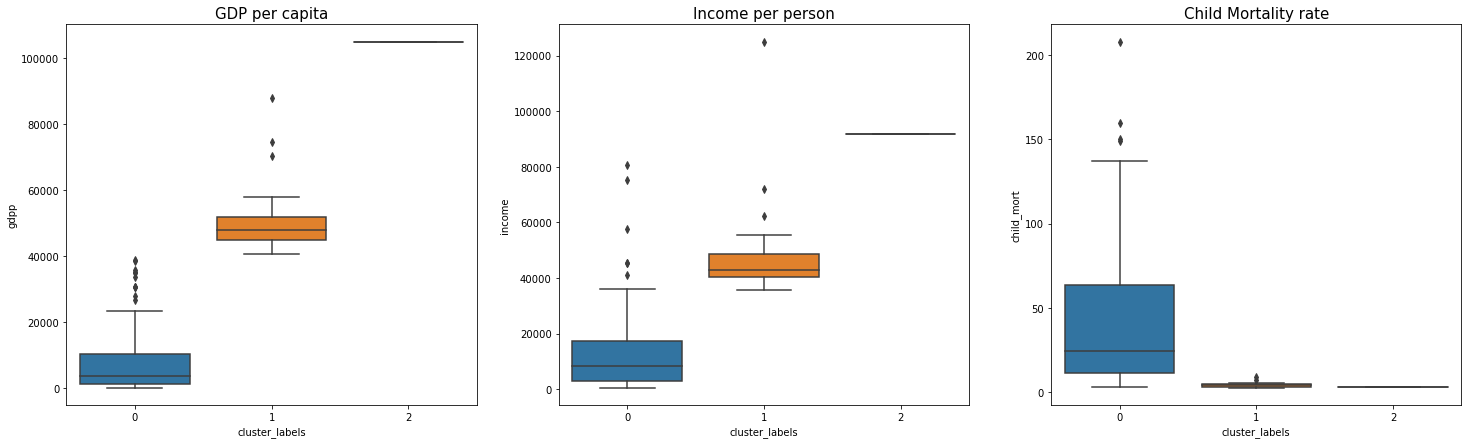

In [304]:
# Viewing the boxplots for the created Clusters_id

f, axes = plt.subplots(1, 3, figsize=(25,7))

sns.boxplot(x='cluster_labels',y='gdpp',data=df1,ax=axes[0])
axes[0].set_title('GDP per capita',fontsize=15)

sns.boxplot(x='cluster_labels',y='income',data=df1,ax=axes[1])
axes[1].set_title('Income per person',fontsize=15)

sns.boxplot(x='cluster_labels',y='child_mort',data=df1,ax=axes[2])
axes[2].set_title('Child Mortality rate',fontsize=15)

plt.show()

- ### Cluster Profiling

In [305]:
# Find the countries that are in need to aid based on 3 columns- GDPP, Child_mort, Income

df1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


In [306]:
# Fetching the count for all different clusters

df1.cluster_labels.value_counts()

0    148
1     18
2      1
Name: cluster_labels, dtype: int64

In [312]:
# Calculating mean of the required columns(child_mort, income, gdpp) for comparison

new_GDPP1 = pd.DataFrame(df1.groupby(["cluster_labels"]).gdpp.mean())
new_child_mort1 = pd.DataFrame(df1.groupby(["cluster_labels"]).child_mort.mean())
new_income1 = pd.DataFrame(df1.groupby(["cluster_labels"]).income.mean())
hc_df = pd.concat([ new_GDPP1 ,  new_child_mort1 , new_income1 ], axis=1)
hc_df

,gdpp,child_mort,income
cluster_labels,,,
0,7551.445946,42.630405,12641.641892
1,52355.555556,4.388889,50027.777778
2,105000.000000,2.800000,91700.000000


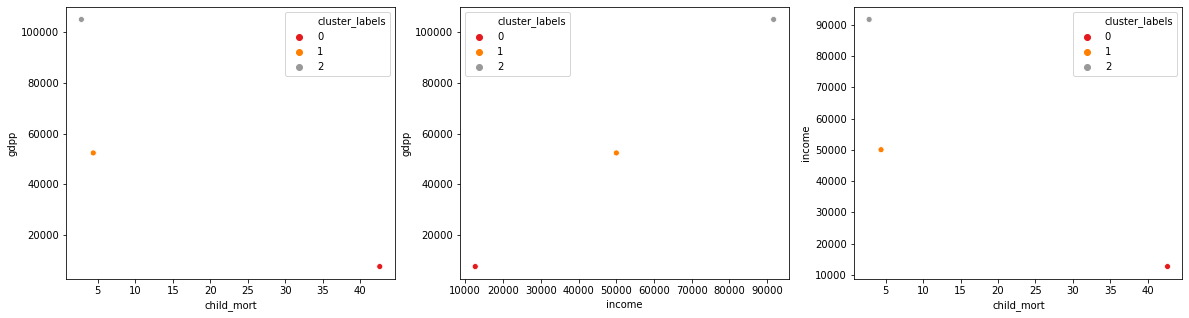

In [313]:
# Scatter plot to view all the 3 clusters

f, axes = plt.subplots(1, 3, figsize=(20,5))

sns.scatterplot(x='child_mort',y='gdpp', data = hc_df, hue = hc_df.index ,ax=axes[0],palette='Set1')
sns.scatterplot(x='income',y='gdpp', data = hc_df , hue = hc_df.index, ax=axes[1],palette='Set1')
sns.scatterplot(x='child_mort',y='income', data = hc_df ,hue = hc_df.index,ax=axes[2],palette='Set1')

plt.show()

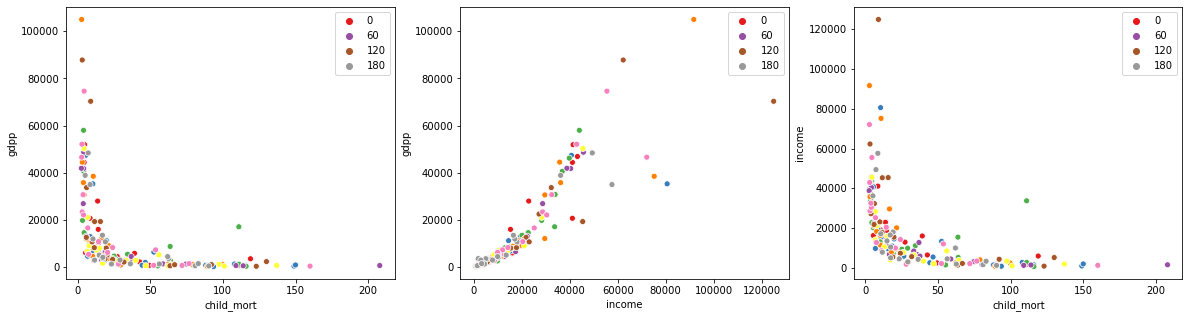

In [307]:
f, axes = plt.subplots(1, 3, figsize=(20,5))

sns.scatterplot(x='child_mort',y='gdpp',data=df1,hue=df1.index,palette='Set1',ax=axes[0])
sns.scatterplot(x='income',y='gdpp',data=df1,hue=df1.index,palette='Set1',ax=axes[1])
sns.scatterplot(x='child_mort',y='income',data=df1,hue=df1.index,palette='Set1',ax=axes[2])


plt.show()

<Figure size 1800x1800 with 0 Axes>

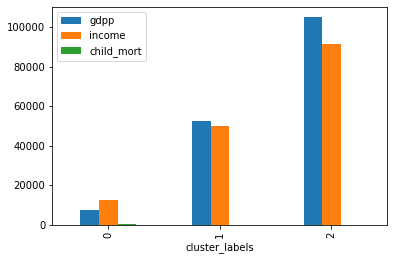

In [308]:
# Plotting bar graph to compare values

# Low GDPP -- High Child_mort -- Low Income

plt.figure(figsize= [25,25])
df1[['gdpp', 'income', 'child_mort','cluster_labels']].groupby("cluster_labels").mean().plot(kind = 'bar')
plt.show()

Child_Mort is too low to be visible in any clusters

In [309]:
# Sorting values based on the above plot to pick the country with diremost need for K-Means model

df1[df1['cluster_labels']==0].sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, True, False])

,country,child_mort,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,cluster_id,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,2,0
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.470,60.8,5.02,327,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,2,0
112,Niger,123.0,77.2560,17.9568,170.868,814,2.550,58.8,7.49,348,2,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.200,55.0,5.20,399,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
157,United Arab Emirates,8.6,27195.0000,1281.0000,22260.000,57600,12.500,76.5,1.87,35000,1,0
23,Brunei,10.5,23792.2000,1002.5200,9884.000,80600,16.700,77.1,1.84,35300,1,0
75,Italy,4.0,9021.6000,3411.7400,9737.600,36200,0.319,81.7,1.46,35800,1,0
82,Kuwait,10.8,25679.5000,1012.5500,11704.000,75200,11.200,78.2,2.21,38500,1,0


In [310]:
# Sorting values based on the above plot to pick the country with diremost need for Hierarchical Clustering model

df1[df1['cluster_id']==0].sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, True, False])


,country,child_mort,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,cluster_id,cluster_labels
109,Nepal,47.0,56.7136,31.0800,215.488,1990,15.100,68.3,2.61,592,0,0
146,Tajikistan,52.4,109.9620,44.1324,432.468,2110,12.500,69.6,3.51,738,0,0
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440,7.140,70.4,2.33,758,0,0
27,Cambodia,44.4,425.2260,44.6448,467.670,2520,3.120,66.1,2.88,786,0,0
83,Kyrgyz Republic,29.6,454.0800,54.3840,718.960,2790,10.000,68.5,3.10,880,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
122,Portugal,3.9,6727.5000,2475.0000,8415.000,27200,0.643,79.8,1.39,22500,0,0
135,Slovenia,3.2,15046.2000,2201.9400,14718.600,28700,-0.987,79.5,1.57,23400,0,0
60,Greece,3.9,5944.9000,2770.7000,8258.300,28700,0.673,80.4,1.48,26900,0,0
10,Bahamas,13.8,9800.0000,2209.2000,12236.000,22900,-0.393,73.8,1.86,28000,0,0


In [311]:
final=df1[df1['gdpp']<=1900]
final=final[final['child_mort']>= 90]
final=final[final['income']<= 3800]

final=final.sort_values(by=['gdpp','income','child_mort'],ascending=[True,True,False])

for countries in final.country[:15]:
    print(countries)

Burundi
Congo, Dem. Rep.
Niger
Sierra Leone
Mozambique
Central African Republic
Malawi
Togo
Guinea-Bissau
Afghanistan
Burkina Faso
Guinea
Haiti
Mali
Benin


## Step 8: Conclusion:


Based on the EDA and Clustering performed on the data using both K-Means and Hierarchical Clustering, we find some countries. Again, sorting these countries for their **Low GDPP, High Child Mortality** and **Low Income**, the top 15 countries that are in dire need of some AID are-


1. Burundi
2. Congo, Dem. Rep.
3. Niger
4. Sierra Leone
5. Mozambique
6. Central African Republic
7. Malawi
8. Togo
9. Guinea-Bissau
10. Afghanistan
11. Burkina Faso
12. Guinea
13. Haiti
14. Mali
15. Benin